In [281]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt


In [282]:

company = 'Allianz500'
df_portfolios = pd.DataFrame(pd.read_csv('C:/Users/thy10/Desktop/AREIX/AREIX Jupyter/df_portfolios_'+company+'.csv', header = 0, index_col=0))
print(df_portfolios.head())

                              A_name                         B_name  A_weight  \
Date                                                                            
2001-02  Allianz Capital Stable Fund  Allianz MPF Conservative Fund  0.356652   
2001-02   Allianz Stable Growth Fund  Allianz MPF Conservative Fund  0.388420   
2001-03  Allianz Capital Stable Fund  Allianz MPF Conservative Fund  0.364209   
2001-03   Allianz Stable Growth Fund  Allianz MPF Conservative Fund  0.354557   
2001-04  Allianz Capital Stable Fund            Allianz Growth Fund  0.359266   

         B_weight  port_return  port_vol  flag  next_month_port_return  \
Date                                                                     
2001-02  0.643348    -0.005180       NaN     1               -0.012893   
2001-02  0.611580    -0.011834       NaN     1               -0.021841   
2001-03  0.635791    -0.013237  0.088578     0                0.008664   
2001-03  0.645443    -0.019647  0.101885     0                

In [283]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
model = lgb.Booster(model_file='lgb_classifier.txt')

X= df_portfolios.iloc[:,[2,3,4,5]].values
y=df_portfolios.iloc[:,6].values

y_pred = model.predict(X)
print(y_pred)
for i in range(len(y_pred)):
    if (y_pred[i] >= 0.4):  #0.4
        y_pred[i] = 1
    else:
        y_pred[i] = 0




[0.42387809 0.42387809 0.23183069 ... 0.05383796 0.05383796 0.05383796]


In [284]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y)
print("accuracy checking")
accuracy

accuracy checking


0.637246963562753

## Plot importance graph

<Figure size 864x432 with 0 Axes>

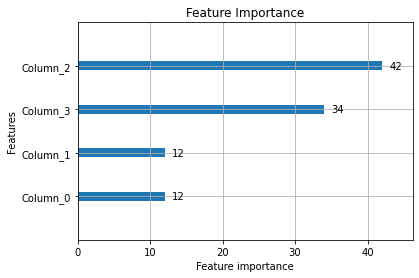

In [285]:
plt.figure(figsize=(12,6))
lgb.plot_importance(model, max_num_features=30)
plt.title("Feature Importance")
plt.show()

## Confusion Metrics

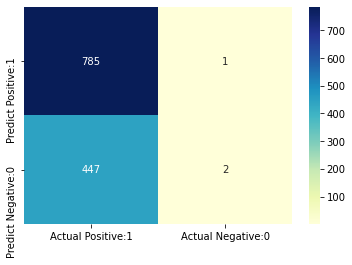

In [286]:
import seaborn as sns # statistical data visualization
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Parameters Tuning

## Output